In [5]:
import qiskit as q
%matplotlib inline
circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# initialized to 0, 0
circuit.x(0)
# flipped first qubit, now it's 1, 0
circuit.cx(0, 1)
# flipped to 1, 1

circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [9]:
from qiskit import IBMQ

IBMQ.save_account(open("token.txt", "r").read())
# accessing my account with my saved token as a txt file

In [10]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

# finding which backend has the smallest queue 

ibmq_qasm_simulator has 5 queued and simulated qubits
ibmq_armonk has 7 queued and 1 qubits
ibmq_santiago has 3 queued and 5 qubits
ibmq_bogota has 22 queued and 5 qubits
ibmq_lima has 11 queued and 5 qubits
ibmq_belem has 7 queued and 5 qubits
ibmq_quito has 19 queued and 5 qubits
simulator_statevector has 4 queued and simulated qubits
simulator_mps has 4 queued and simulated qubits
simulator_extended_stabilizer has 5 queued and simulated qubits
simulator_stabilizer has 5 queued and simulated qubits
ibmq_manila has 14 queued and 5 qubits


In [15]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_santiago")
job = q.execute(circuit, backend = backend, shots = 500)
#executes the circuit we created above with the chosen backend and 500 shots (could be more or less)

job_monitor(job)
# monitors where we are in the queue and if the job has run

Job Status: job has successfully run


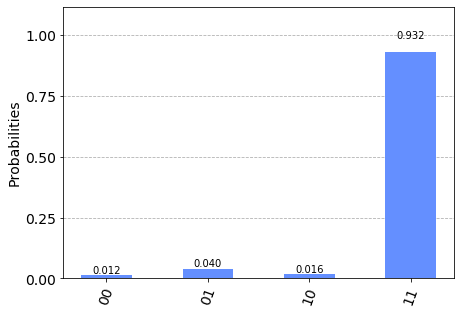

In [16]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])